# Importing Libraries

In this notebook, we will be performing customer segmentation using clustering techniques. To begin, we import the necessary libraries for data manipulation, visualization, and machine learning. These libraries include `pandas` and `numpy` for data handling, `seaborn` and `matplotlib` for visualizations, and `sklearn` for modeling and clustering.


In [178]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from sklearn.cluster import AgglomerativeClustering
import warnings
from sklearn.cluster import KMeans
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# Loading the Dataset

We are working with a marketing campaign dataset that contains customer information such as their spending habits, response to promotions, and demographics. The dataset will be loaded into a pandas DataFrame for further analysis. Our goal is to understand the purchasing behavior of different customer segments and identify opportunities for targeted marketing.


In [179]:
#Loading the dataset
data = pd.read_csv("../data/marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [180]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Handling Missing Data

It's important to ensure that our dataset is clean before proceeding with analysis. We start by checking for missing values and decide how to handle them. In this case, we drop the rows with missing values to maintain a clean dataset.

In [181]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


# Feature Engineering

To enhance our analysis, we will create new features that capture important information. For example, we will create a feature `Days_Customer` to represent the number of days since a customer registered with the company. This new feature will help us understand customer loyalty and how long they have been engaged with the brand.

In [182]:
data['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2216, dtype: object

In [183]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"],dayfirst=True)
data["Dt_Customer"] 

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [184]:
# Find the newest and oldest dates in the dataset
newest_date = data["Dt_Customer"].max()
oldest_date = data["Dt_Customer"].min()
# Print the newest and oldest recorded dates
print("The newest customer's enrolment date in the records:", newest_date.date())
print("The oldest customer's enrolment date in the records:", oldest_date.date())

The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [185]:
# Create a new feature "Days_Customer" which is the number of days since enrolment
data["Days_Customer"] = (newest_date - data["Dt_Customer"]).dt.days

# Display the first few rows to check the new feature
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,161


In [186]:
print(data[["Dt_Customer", "Days_Customer"]].head())


  Dt_Customer  Days_Customer
0  2012-09-04            663
1  2014-03-08            113
2  2013-08-21            312
3  2014-02-10            139
4  2014-01-19            161


# Exploring Categorical Features

Understanding the distribution of categorical features such as `Marital_Status` and `Education` is crucial for profiling our customer segments. We will examine the unique values in these columns to understand the diversity of our customers.


In [187]:
# Explore unique categories in the 'Marital_Status' column
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")

# Explore unique categories in the 'Education' column
print("Total categories in the feature Education:\n", data["Education"].value_counts(), "\n")

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64 



In [155]:
# Age of customer today
data["Age"] = 2024 - data["Year_Birth"]

# Total spendings on various items
data["Spent"] = (
    data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] +
    data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
)

# Deriving living situation by marital status
data["Living_With"] = data["Marital_Status"].replace({
    "Married": "Partner", 
    "Together": "Partner", 
    "Absurd": "Alone", 
    "Widow": "Alone", 
    "YOLO": "Alone", 
    "Divorced": "Alone", 
    "Single": "Alone"
})

# Feature indicating total children living in the household
data["Children"] = data["Kidhome"] + data["Teenhome"]

# Feature for total members in the household
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner": 2}) + data["Children"]

# Feature pertaining to parenthood
data["Is_Parent"] = np.where(data["Children"] > 0, 1, 0)

# Segmenting education levels into three groups
data["Education"] = data["Education"].replace({
    "Basic": "Undergraduate", 
    "2n Cycle": "Undergraduate", 
    "Graduation": "Graduate", 
    "Master": "Postgraduate", 
    "PhD": "Postgraduate"
})

# Renaming columns for clarity
data = data.rename(columns={
    "MntWines": "Wines", 
    "MntFruits": "Fruits", 
    "MntMeatProducts": "Meat", 
    "MntFishProducts": "Fish", 
    "MntSweetProducts": "Sweets", 
    "MntGoldProds": "Gold"
})

# Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

# Check the resulting data
data.head()


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Days_Customer,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,663,67,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,113,70,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,312,59,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,139,40,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,161,43,422,Partner,1,3,1


In [156]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Customer,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,353.521209,55.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,202.434667,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,355.500000,54.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,529.000000,65.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,699.000000,131.000000,2525.000000,3.000000,5.000000,1.000000


# Data Visualization

Data visualization helps us explore relationships between different features and customer spending behavior. We will use various plots such as boxen plots and scatter plots to gain insights into how different customer traits (e.g., age, income, family size) relate to their spending patterns.


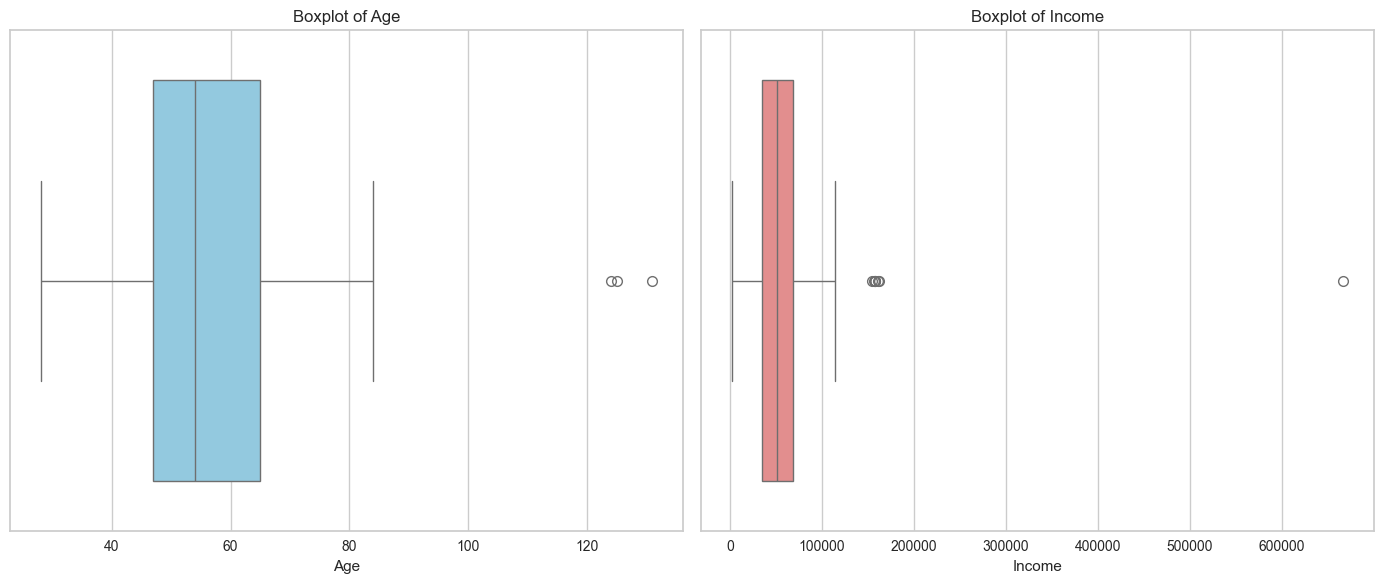

In [157]:
# Set style for plots
sns.set_style(style="whitegrid")
# Plot boxplots for Age and Income to detect outliers
plt.figure(figsize=(14, 6))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=data["Age"], color='skyblue')
plt.title('Boxplot of Age')

# Boxplot for Income
plt.subplot(1, 2, 2)
sns.boxplot(x=data["Income"], color='lightcoral')
plt.title('Boxplot of Income')

plt.tight_layout()
plt.show()

In [158]:
# Dropping outliers by setting a cap on Age and Income
data = data[(data["Age"] <= 100)]  # Removing outliers in 'Age' (age > 100)
data = data[(data["Income"] <= 600000)]  # Removing outliers in 'Income' (income > 600,000)

# Checking the number of remaining data points
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


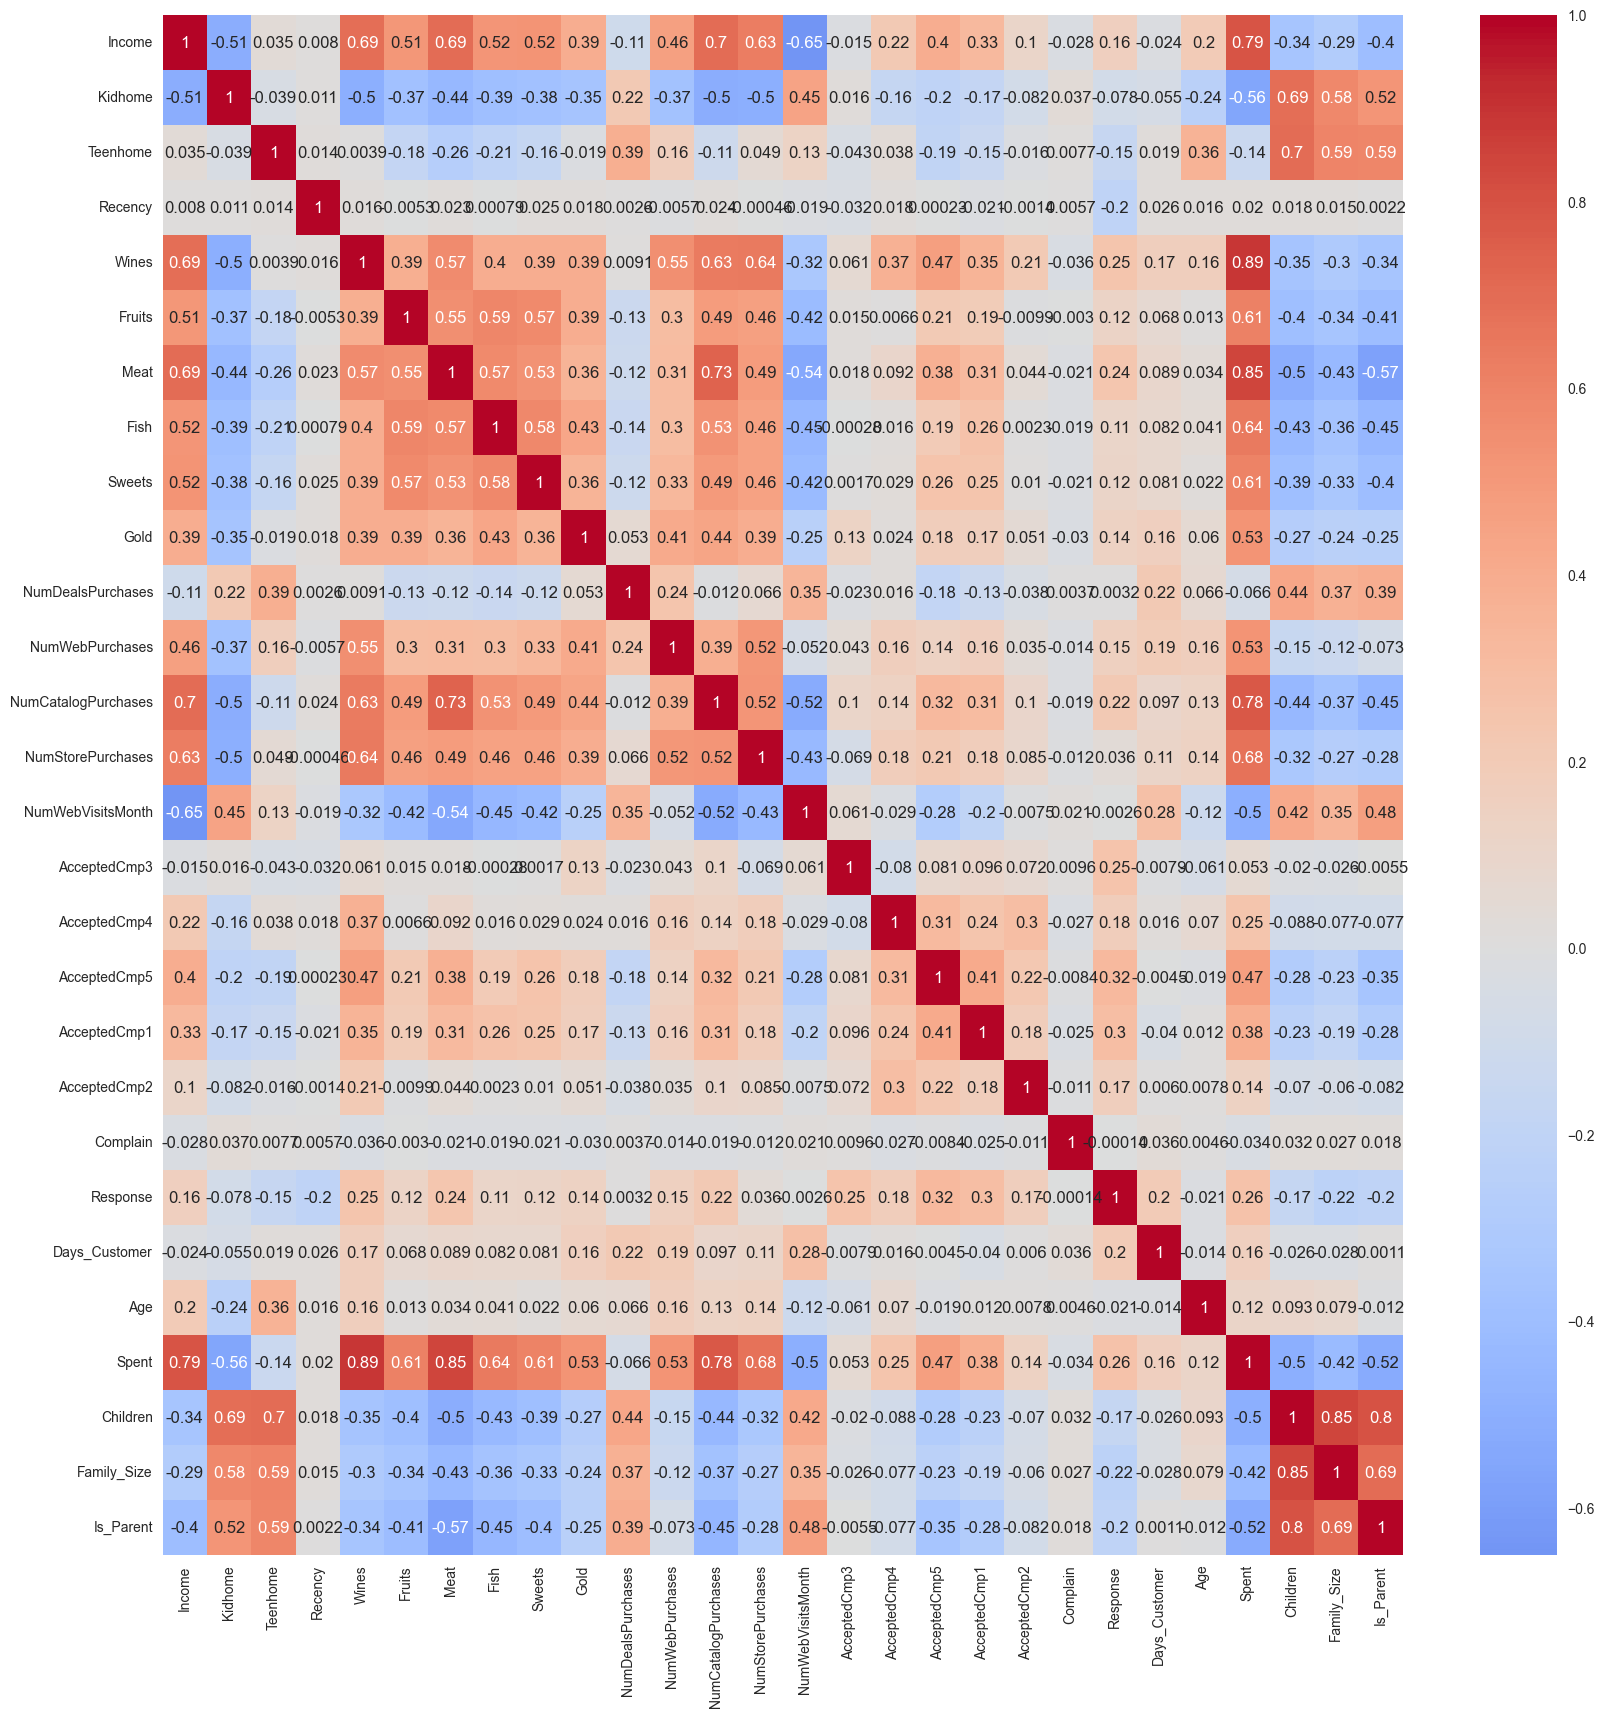

In [159]:
# Select only the numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix on the numeric columns only
corrmat = numeric_data.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', center=0)
plt.show()


In [160]:
# Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)


Categorical variables in the dataset: ['Education', 'Living_With']


In [161]:
# Label encode the categorical features
label_encoder = LabelEncoder()

for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Verify the encoding
print(data[object_cols].head())

   Education  Living_With
0          0            0
1          0            0
2          0            1
3          0            1
4          1            1


In [162]:
ds = data.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)
print("All features are now scaled")


All features are now scaled


In [163]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_Customer,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [164]:
# Apply PCA to reduce the dimensions to 3
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_ds)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Print explained variance to understand how much variance is captured by the components
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each principal component: {explained_variance}")
print(f"Total explained variance: {sum(explained_variance)}")


Explained variance by each principal component: [0.36011321 0.12699844 0.06592895]
Total explained variance: 0.5530406041071536


In [165]:
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2212.0,1.927331e-17,2.878602,-5.978124,-2.539470,-0.781595,2.386380,7.452915
PC2,2212.0,8.351768e-17,1.709469,-4.194757,-1.323929,-0.173721,1.234851,6.168189
PC3,2212.0,-1.365193e-17,1.231687,-3.625248,-0.853713,-0.050842,0.863974,6.750458


In [166]:
# Display the loading of each feature on the principal components
pca_components = pd.DataFrame(pca.components_, columns=scaled_ds.columns, index=['PC1', 'PC2', 'PC3'])
print(pca_components)


     Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
PC1  -0.027109  0.278849 -0.245857 -0.098322  0.003755  0.255717  0.238582   
PC2  -0.053201  0.161668  0.011826  0.454069  0.019573  0.202957  0.019908   
PC3   0.024087 -0.213024  0.044240 -0.190255 -0.009914  0.077241 -0.006050   

         Meat      Fish    Sweets  ...  NumCatalogPurchases  \
PC1  0.285402  0.248880  0.237494  ...             0.277247   
PC2  0.008854  0.010334  0.031662  ...             0.103129   
PC3 -0.031658 -0.007404 -0.009867  ...            -0.030408   

     NumStorePurchases  NumWebVisitsMonth  Days_Customer       Age     Spent  \
PC1           0.241587          -0.224275       0.031659  0.038139  0.320189   
PC2           0.203546           0.072790       0.133333  0.215507  0.133373   
PC3           0.004267           0.456500       0.562519 -0.260063  0.044519   

     Living_With  Children  Family_Size  Is_Parent  
PC1    -0.027592 -0.247544    -0.219289  -0.242110  
PC2    

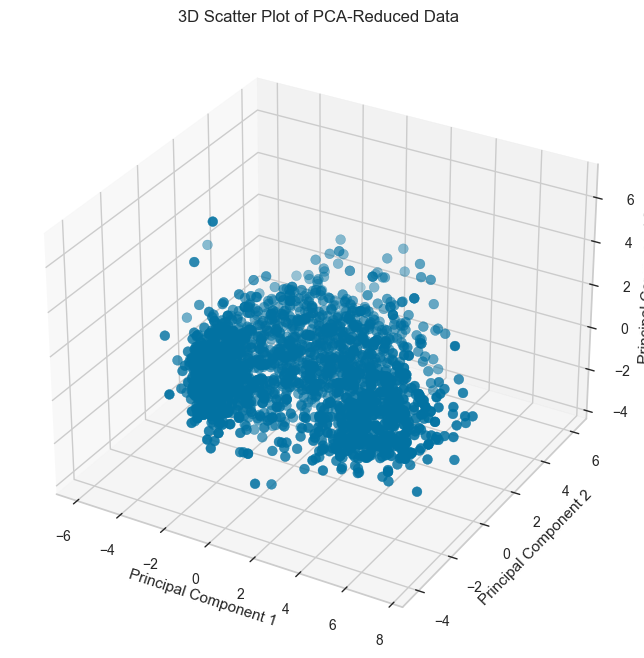

In [167]:
# If clustering has already been done, you can visualize the clusters
# Assuming the cluster labels are stored in 'ds['Cluster']'

# 3D scatter plot of the PCA results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the points with cluster coloring (replace 'Cluster' with your cluster column if available)
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], cmap='viridis', s=50)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of PCA-Reduced Data')
plt.show()


# Clustering

To segment our customers into distinct groups, we will use clustering techniques. Clustering allows us to group customers with similar characteristics and spending behaviors, which will help us identify different customer segments. These segments can then be used for personalized marketing strategies.


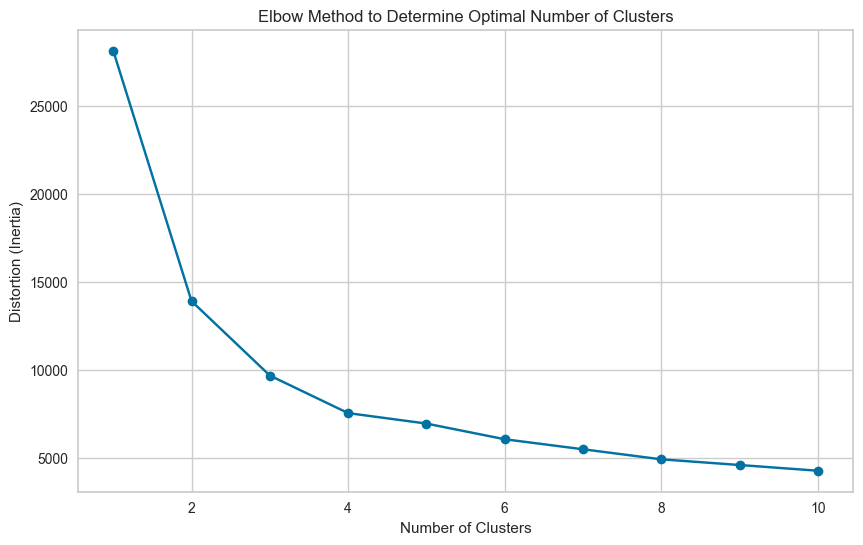

In [168]:
# Elbow method to determine the optimal number of clusters using K-Means
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    distortions.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.show()

In [169]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)  
clusters = agg_clustering.fit_predict(pca_df)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Check the distribution of clusters
print(pca_df['Cluster'].value_counts())

Cluster
1    598
3    563
0    556
2    495
Name: count, dtype: int64


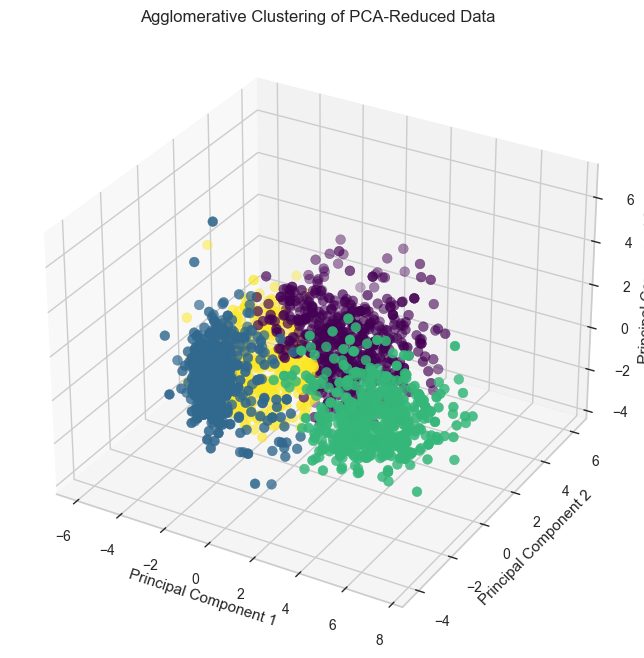

In [170]:
# 3D scatter plot to visualize the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded clusters
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Agglomerative Clustering of PCA-Reduced Data')
plt.show()


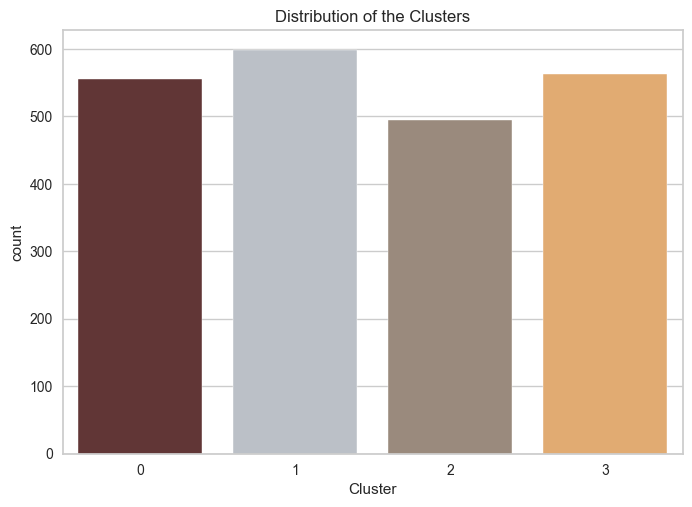

In [171]:
# Set color palette for clusters
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]

# Plotting the countplot of clusters
pl = sns.countplot(x=pca_df["Cluster"], palette=pal)  
pl.set_title("Distribution of the Clusters")
plt.show()

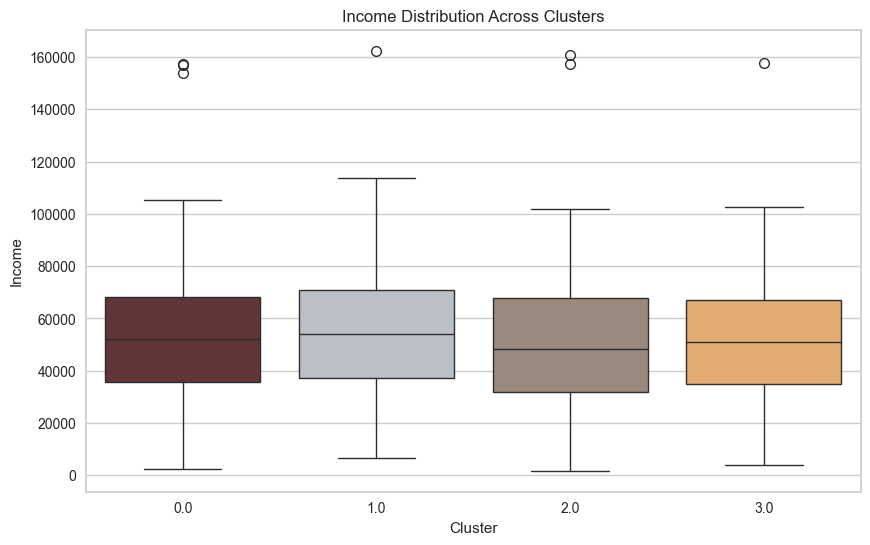

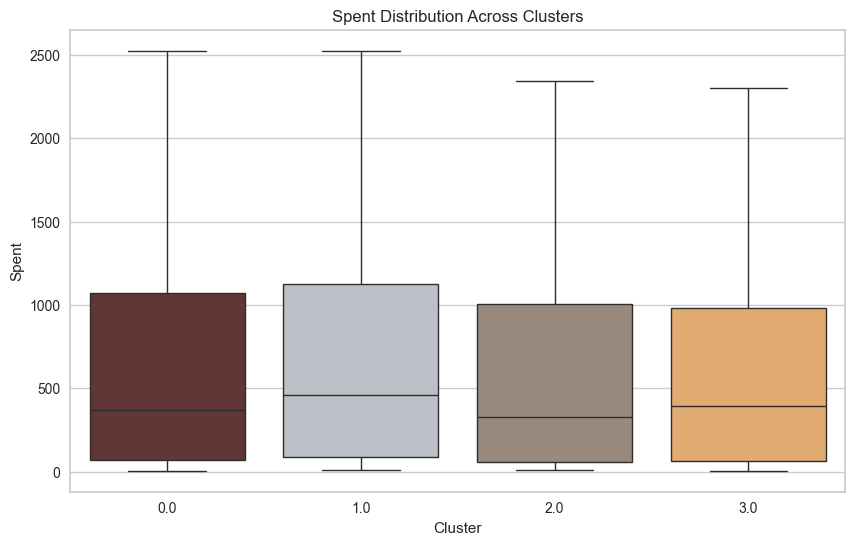

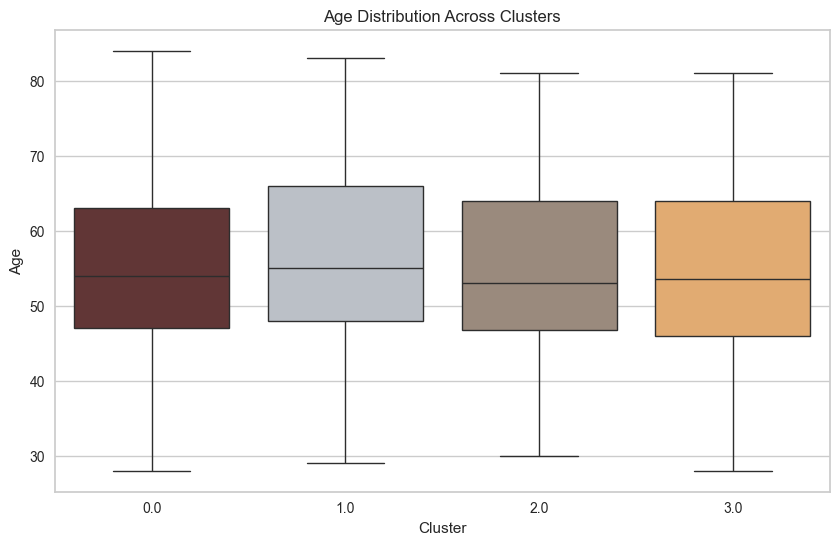

In [172]:
# Boxplot of Income by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x=pca_df["Cluster"], y=data["Income"], palette=pal)
plt.title('Income Distribution Across Clusters')
plt.show()

# Boxplot of Spent by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x=pca_df["Cluster"], y=data["Spent"], palette=pal)
plt.title('Spent Distribution Across Clusters')
plt.show()

# Boxplot of Age by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x=pca_df["Cluster"], y=data["Age"], palette=pal)
plt.title('Age Distribution Across Clusters')
plt.show()


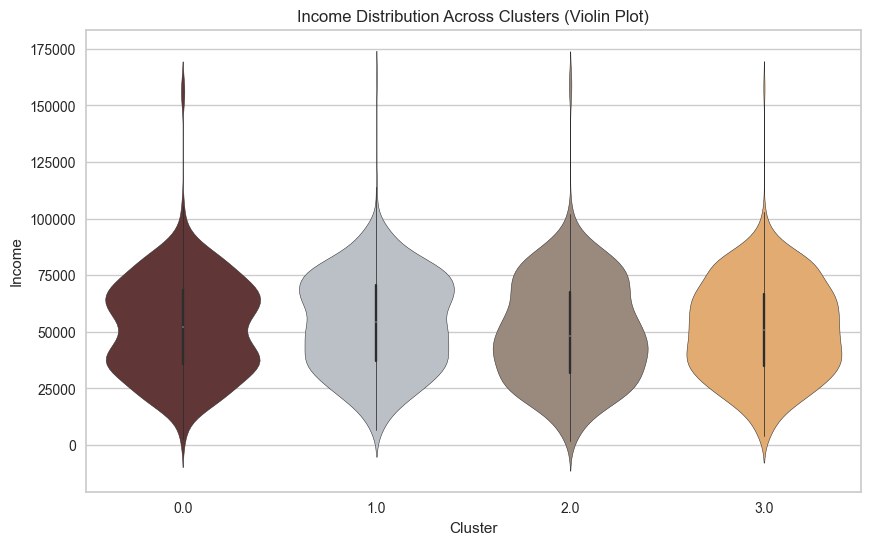

In [173]:
# Violin plot of Income by cluster
plt.figure(figsize=(10, 6))
sns.violinplot(x=pca_df["Cluster"], y=data["Income"], palette=pal)
plt.title('Income Distribution Across Clusters (Violin Plot)')
plt.show()


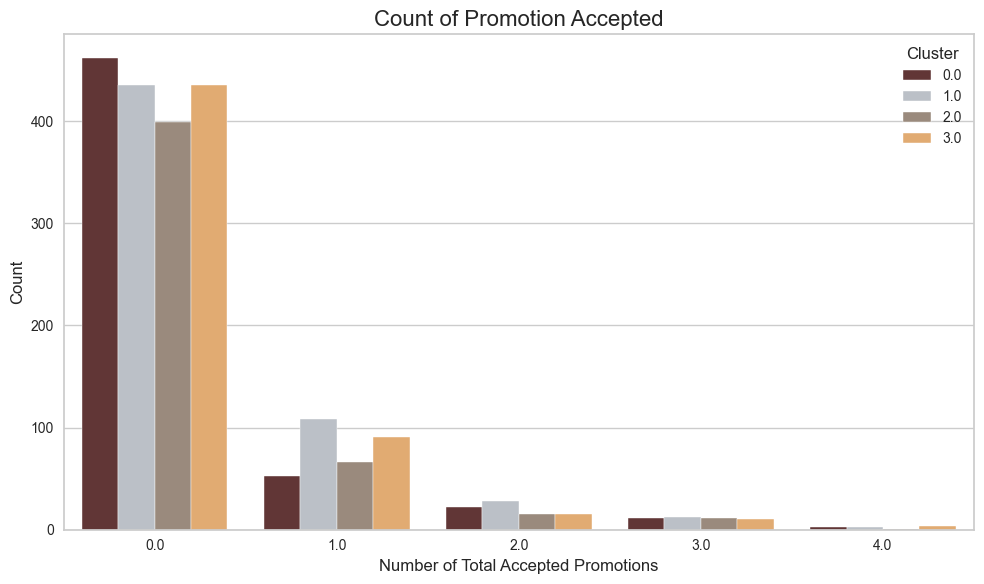

In [174]:


# Create a feature to get the sum of accepted promotions
data["Total_Promos"] = (data["AcceptedCmp1"] + data["AcceptedCmp2"] + 
                        data["AcceptedCmp3"] + data["AcceptedCmp4"] + 
                        data["AcceptedCmp5"])

# Plotting the count of total campaigns accepted, separated by clusters
plt.figure(figsize=(10, 6))
pl = sns.countplot(x=data["Total_Promos"], hue=pca_df["Cluster"], palette=pal)

# Set title and labels
pl.set_title("Count of Promotion Accepted", fontsize=16)
pl.set_xlabel("Number of Total Accepted Promotions", fontsize=12)
pl.set_ylabel("Count", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


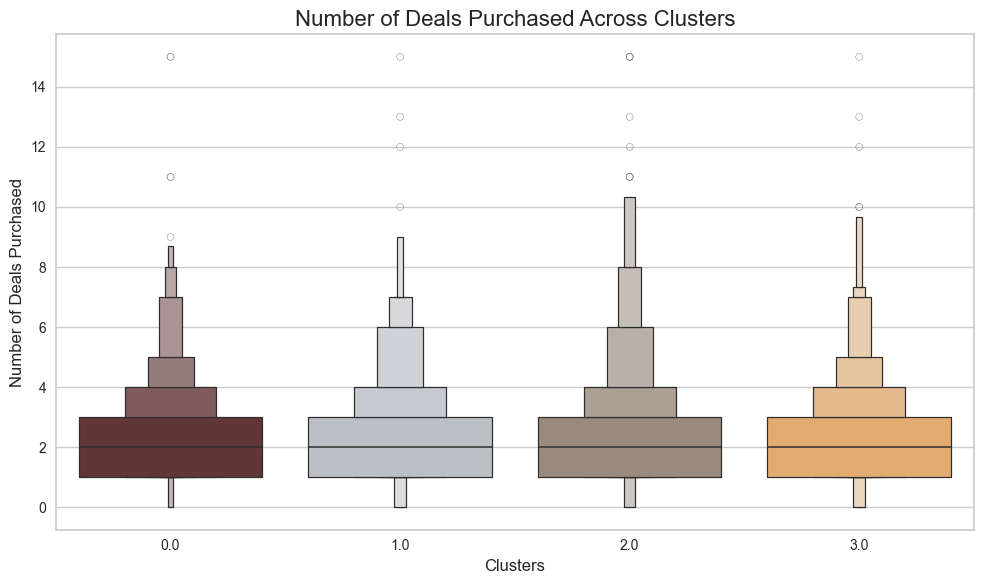

In [175]:
# Plotting the number of deals purchased
plt.figure(figsize=(10, 6))  # Set figure size for better visibility
pl = sns.boxenplot(y=data["NumDealsPurchases"], x=pca_df["Cluster"], palette=pal)

# Set the title and labels
pl.set_title("Number of Deals Purchased Across Clusters", fontsize=16)
pl.set_xlabel("Clusters", fontsize=12)
pl.set_ylabel("Number of Deals Purchased", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

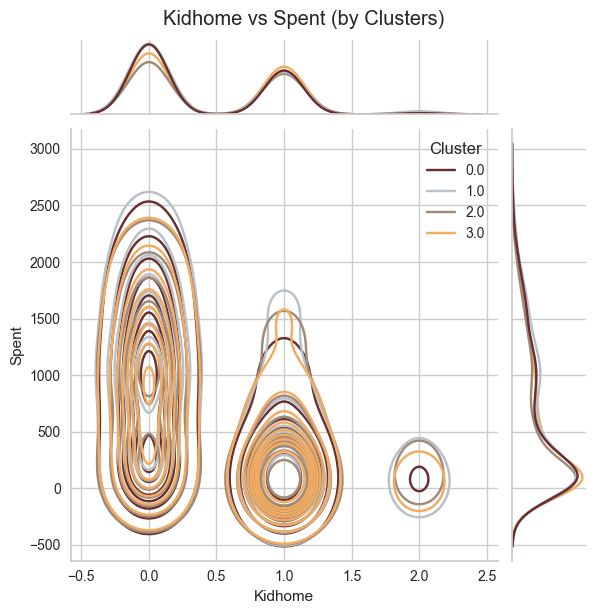

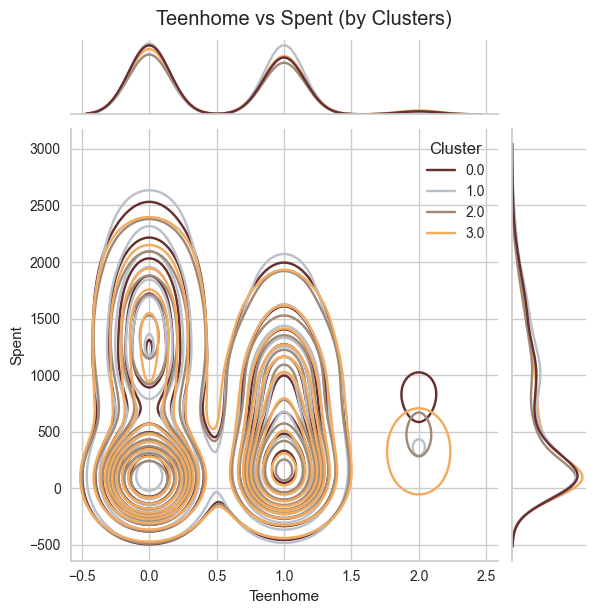

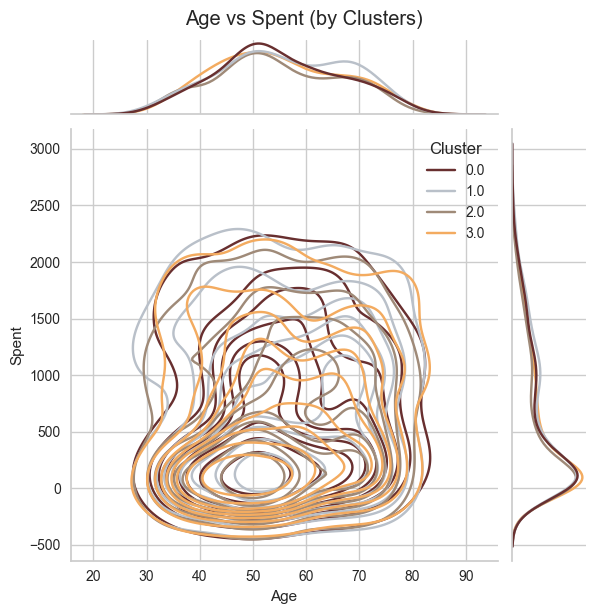

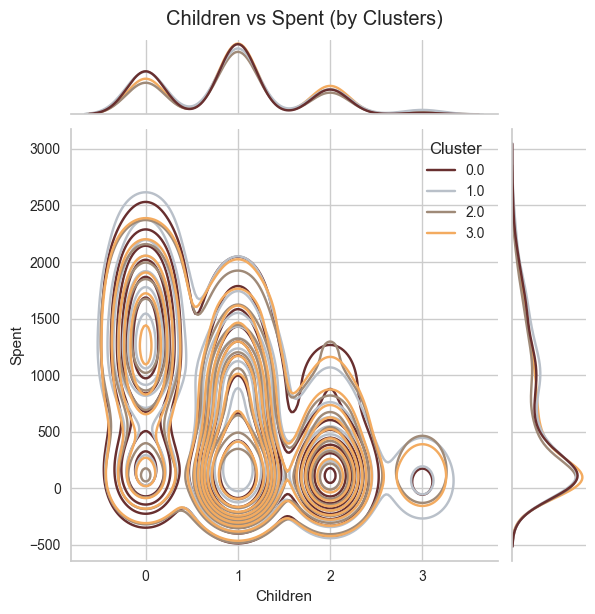

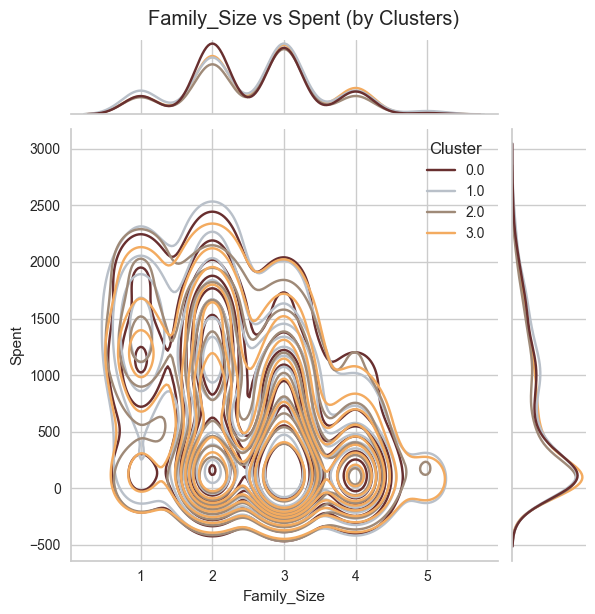

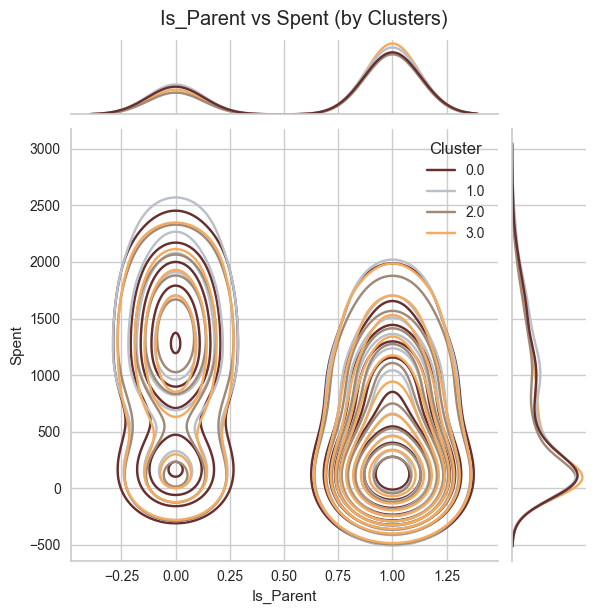

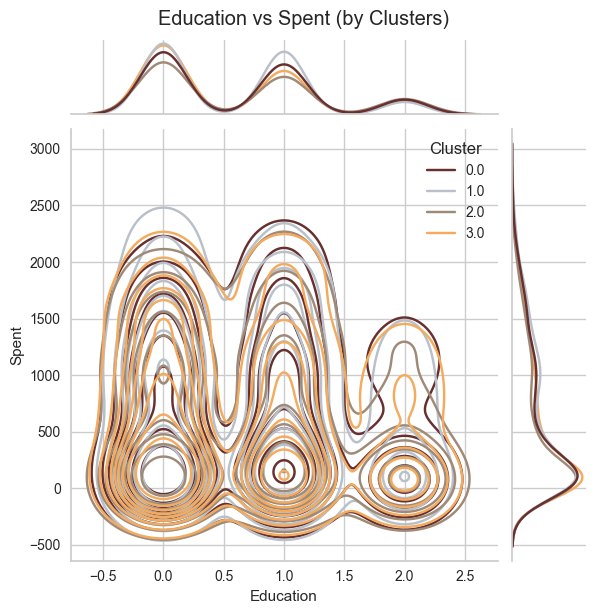

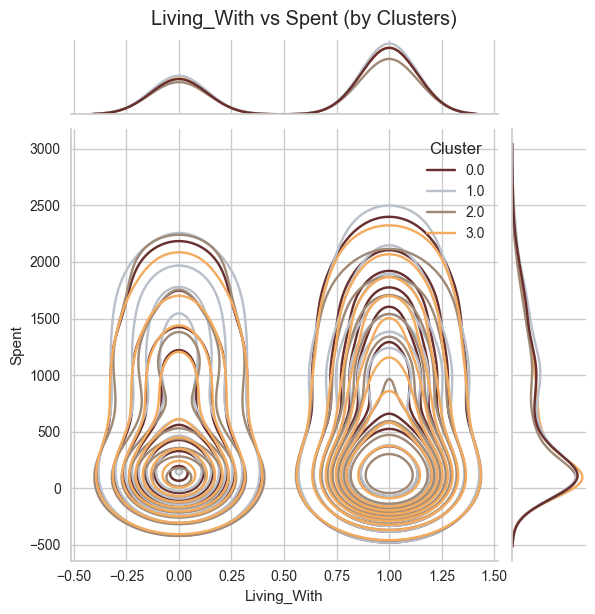

In [176]:
Personal = ["Kidhome", "Teenhome", "Age", "Children", "Family_Size", "Is_Parent", "Education", "Living_With"]

for i in Personal:
    sns.jointplot(x=data[i], y=data["Spent"], hue=pca_df["Cluster"], kind="kde", palette=pal)
    plt.suptitle(f'{i} vs Spent (by Clusters)', y=1.02)  # Title for each plot
    plt.show()


# Conclusion

In this notebook, we successfully segmented the customer base using clustering techniques. We explored customer traits such as income, spending habits, family size, and engagement with marketing campaigns. Our analysis revealed key insights into which customer segments are most valuable and which ones may benefit from re-engagement strategies. These findings can help the marketing team tailor their efforts to maximize customer retention and increase sales.
